In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

In [2]:
X = pd.read_csv('/content/xdata.csv', header= None)
y = pd.read_csv('/content/ydata.csv', header= None)

In [3]:
X.columns = ['S.no', 'x1', 'x2']
X.head()

,S.no,x1,x2
0,0,3.482106,2.420392
1,1,3.516279,3.719750
2,2,4.606496,3.414379
3,3,4.677011,3.047244
4,4,4.157725,3.138677


In [4]:
y.columns = ['S.no', 'y']
y.head()

,S.no,y
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


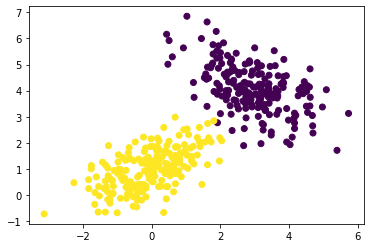

In [7]:
plt.scatter(X['x1'].values, X['x2'].values, c = y['y'].values)
plt.show()

In [8]:
y['y'].unique()

array([0., 1.])

In [9]:
X.drop('S.no', axis = 1, inplace= True)
y.drop('S.no', axis = 1, inplace= True)

In [10]:
X.head()

,x1,x2
0,3.482106,2.420392
1,3.516279,3.719750
2,4.606496,3.414379
3,4.677011,3.047244
4,4.157725,3.138677


In [12]:
y.head()

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [13]:
# changing to np array
X = X.values
y = y.values

In [14]:
X.shape, y.shape

((400, 2), (400, 1))

## KNN Code

In [17]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [62]:
def KNN(X, y, testing_point, k = 7):
    # step 1
    dist_target = []
    for i in range(X.shape[0]):
        dist = distance(testing_point, X[i])
        target = y[i]
        dist_target.append([dist, target])
    
    # step 2
    dist_target = sorted(dist_target)

    # step 3
    k_dist_target = dist_target[:k]
    k_dist_target = np.array(k_dist_target)

    # step 4
    target_count = np.unique(k_dist_target[:, 1], return_counts= True)
    idx_max_count = np.argmax(target_count[1])

    # step 5
    prediction = target_count[0][idx_max_count]

    return prediction

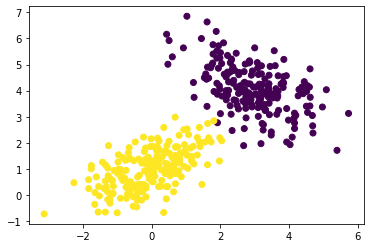

In [63]:
plt.scatter(X[:, 0], X[:, 1], c = y[:, 0])
plt.show()

In [64]:
a = np.array([2, 0])
b = np.array([2, 3])
c = np.array([2, 6])
a, b, c

(array([2, 0]), array([2, 3]), array([2, 6]))

In [65]:
pred_a = KNN(X, y, a)
pred_a

array([1.])

In [66]:
pred_b = KNN(X, y, b)
pred_b

array([0.])

In [67]:
pred_c = KNN(X, y, c)
pred_c

array([0.])

In [69]:
d = {0. : 'red',
     1. : 'blue'}
d

{0.0: 'red', 1.0: 'blue'}

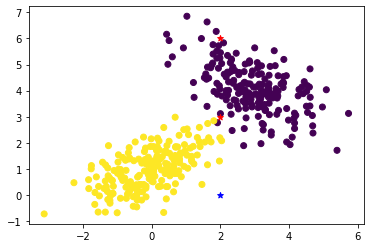

In [75]:
plt.scatter(X[:, 0], X[:, 1], c = y[:, 0])
plt.scatter(a[0], a[1], c = d[float(pred_a)], marker= '*')
plt.scatter(b[0], b[1], c = d[float(pred_b)], marker= '*')
plt.scatter(c[0], c[1], c = d[float(pred_c)], marker= '*')
plt.show()